In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from scipy import stats

In [4]:
data=pd.read_csv("2.csv")

In [5]:
data

,Student ID,Age,Gender,Major,Math Score,Physics Score,Chemistry Score,English Score,Total
0,1,20,Male,Mathematics,85.0,90,92.0,80,347
1,2,21,Female,Physics,78.0,85,NaN,90,350
2,3,19,Male,Chemistry,92.0,88,80.0,78,320
3,4,22,Female,Computer Science,80.0,82,80.0,86,100
4,5,18,Male,Mathematics,88.0,95,80.0,84,400
5,6,20,Female,Physics,76.0,80,80.0,88,380
6,7,19,Male,Chemistry,NaN,87,80.0,82,600
7,8,21,Female,Computer,82.0,78,80.0,90,290
8,9,18,Male,Mathematics,90.0,92,80.0,92,310
9,10,22,Female,Physics,79.0,83,80.0,95,325


In [6]:
data1=data.copy()

In [7]:
print(data.isnull().sum())

Student ID         0
Age                0
Gender             0
Major              0
Math Score         1
Physics Score      0
Chemistry Score    1
English Score      0
Total              0
dtype: int64


In [8]:
data=data.fillna(data.mean())

C:\Users\Sumit\AppData\Local\Temp\ipykernel_22468\2490576204.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=data.fillna(data.mean())


In [9]:
data

,Student ID,Age,Gender,Major,Math Score,Physics Score,Chemistry Score,English Score,Total
0,1,20,Male,Mathematics,85.000000,90,92.000000,80,347
1,2,21,Female,Physics,78.000000,85,81.333333,90,350
2,3,19,Male,Chemistry,92.000000,88,80.000000,78,320
3,4,22,Female,Computer Science,80.000000,82,80.000000,86,100
4,5,18,Male,Mathematics,88.000000,95,80.000000,84,400
5,6,20,Female,Physics,76.000000,80,80.000000,88,380
6,7,19,Male,Chemistry,83.333333,87,80.000000,82,600
7,8,21,Female,Computer,82.000000,78,80.000000,90,290
8,9,18,Male,Mathematics,90.000000,92,80.000000,92,310
9,10,22,Female,Physics,79.000000,83,80.000000,95,325


In [10]:
data1.dropna()

,Student ID,Age,Gender,Major,Math Score,Physics Score,Chemistry Score,English Score,Total
0,1,20,Male,Mathematics,85.0,90,92.0,80,347
2,3,19,Male,Chemistry,92.0,88,80.0,78,320
3,4,22,Female,Computer Science,80.0,82,80.0,86,100
4,5,18,Male,Mathematics,88.0,95,80.0,84,400
5,6,20,Female,Physics,76.0,80,80.0,88,380
7,8,21,Female,Computer,82.0,78,80.0,90,290
8,9,18,Male,Mathematics,90.0,92,80.0,92,310
9,10,22,Female,Physics,79.0,83,80.0,95,325


<AxesSubplot: >

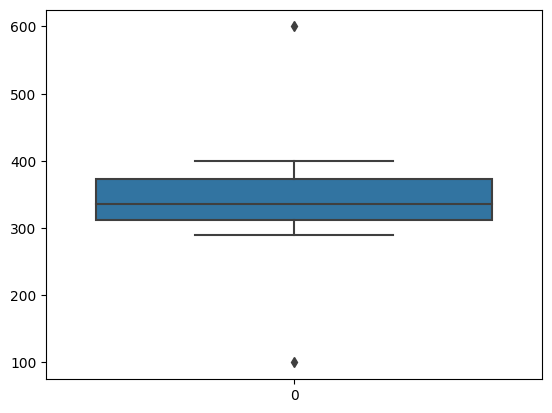

In [11]:
sns.boxplot(data['Total'])

<AxesSubplot: xlabel='Math Score', ylabel='Physics Score'>

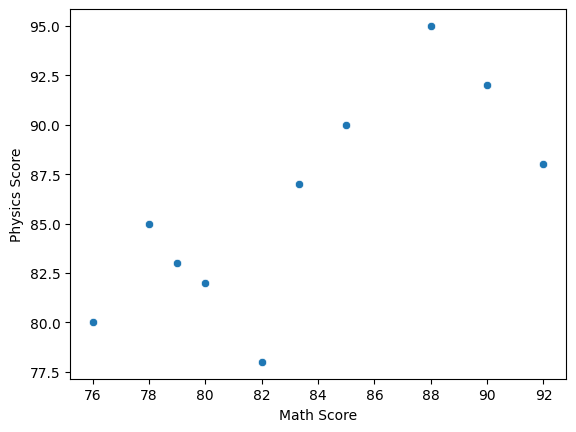

In [12]:
sns.scatterplot(x=data['Math Score'], y=data['Physics Score'])

In [13]:
import scipy.stats as st

In [12]:
st.zscore(data['Total'])

0    0.041385
1    0.067250
2   -0.191404
3   -2.088198
4    0.498340
5    0.325904
6    2.222698
7   -0.450058
8   -0.277622
9   -0.148295
Name: Total, dtype: float64

In [20]:
q1 = data['Total'].quantile(0.25)
q2 = data['Total'].quantile(0.50)
q3 = data['Total'].quantile(0.75)
IQR = q3 - q1
IQR

60.0

In [14]:
UL = q3 + (1.5 * IQR)
LL = q1 - (1.5 * IQR)
print(UL,LL)

462.5 222.5


In [15]:
outl_U = pd.DataFrame(np.where((data['Total']>UL)))
outl_U

,0
0,6


In [16]:
outl_L = pd.DataFrame(np.where((data['Total']<LL)))
outl_L

,0
0,3


In [17]:
to_replace = pd.DataFrame(np.where(data['Total']>UL,data['Total'].mean(),data['Total']))
to_replace

,0
0,347.0
1,350.0
2,320.0
3,100.0
4,400.0
5,380.0
6,342.2
7,290.0
8,310.0
9,325.0


In [18]:
to_replace = pd.DataFrame(np.where(data['Total']<LL,data['Total'].mean(),data['Total']))
to_replace

,0
0,347.0
1,350.0
2,320.0
3,342.2
4,400.0
5,380.0
6,600.0
7,290.0
8,310.0
9,325.0


In [19]:
def normalize(values):
    return (values - values.min())/(values.max() - values.min()) 

data2 = data.copy()

cols = ['Math Score','Physics Score','Chemistry Score','English Score']

data2[cols] = data2[cols].apply(normalize)
data2

,Student ID,Age,Gender,Major,Math Score,Physics Score,Chemistry Score,English Score,Total
0,1,20,Male,Mathematics,0.562500,0.705882,1.000000,0.117647,347
1,2,21,Female,Physics,0.125000,0.411765,0.111111,0.705882,350
2,3,19,Male,Chemistry,1.000000,0.588235,0.000000,0.000000,320
3,4,22,Female,Computer Science,0.250000,0.235294,0.000000,0.470588,100
4,5,18,Male,Mathematics,0.750000,1.000000,0.000000,0.352941,400
5,6,20,Female,Physics,0.000000,0.117647,0.000000,0.588235,380
6,7,19,Male,Chemistry,0.458333,0.529412,0.000000,0.235294,600
7,8,21,Female,Computer,0.375000,0.000000,0.000000,0.705882,290
8,9,18,Male,Mathematics,0.875000,0.823529,0.000000,0.823529,310
9,10,22,Female,Physics,0.187500,0.294118,0.000000,1.000000,325


In [22]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

cols = ['Math Score','Physics Score','Chemistry Score','English Score']

data3 = data.copy()

data3[cols] = mms.fit_transform(data[cols])

data3

,Student ID,Age,Gender,Major,Math Score,Physics Score,Chemistry Score,English Score,Total
0,1,20,Male,Mathematics,0.562500,0.705882,1.000000,0.117647,347
1,2,21,Female,Physics,0.125000,0.411765,0.111111,0.705882,350
2,3,19,Male,Chemistry,1.000000,0.588235,0.000000,0.000000,320
3,4,22,Female,Computer Science,0.250000,0.235294,0.000000,0.470588,100
4,5,18,Male,Mathematics,0.750000,1.000000,0.000000,0.352941,400
5,6,20,Female,Physics,0.000000,0.117647,0.000000,0.588235,380
6,7,19,Male,Chemistry,0.458333,0.529412,0.000000,0.235294,600
7,8,21,Female,Computer,0.375000,0.000000,0.000000,0.705882,290
8,9,18,Male,Mathematics,0.875000,0.823529,0.000000,0.823529,310
9,10,22,Female,Physics,0.187500,0.294118,0.000000,1.000000,325


In [35]:
data4=data.copy()
data4.Total.max()
j = len(str(data4.Total.max()))
data3['Total']/10**j

0    0.347
1    0.350
2    0.320
3    0.100
4    0.400
5    0.380
6    0.600
7    0.290
8    0.310
9    0.325
Name: Total, dtype: float64